In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k
import keras

All the necessary libraries are imported. Numpy is for numerical manipulations. Pandas are for dealing with csv files. MatplotLib is visualizing tool. keras is used here which is open source library for neural networks in python. ImageDataGenerator is used for Data augumentation. Optimizers will help us to find the global minima. Earlystopping is used to incase if we find that over a specific number of epoch the accuracy is not improving then the training could be stopped.


In [6]:
from tensorflow import keras
base_model=keras.applications.VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)

VGG16 is the convolution neural network proposed in 2014. It is trained using imagenet dataset which roughly has 15million high resolution images belonging to 22,000 categories. We are doing Transfer Learning here. Using this model which was already trained with millions of data will help to make prediction accurately by not only depending on the dataset we have.

We are giving include_top=False because VGG16 is a sequence of convolution layers with a dense layer at the end. by giving it as false we mean that we are dropping the dense layer alone. Instead of the dense layer which is already present we will model a full connected layer which will will connected to VGG16.

In [7]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
base_model.trainable=False

Here we are freezing the base model which means that we are fixing the weights which are currently used and we cannot modify the weights of the base model any further.

In [9]:
inputs=Input(shape=(224,224,3)) #creating a input layer of size 224,224,4
x=base_model(inputs,training=False)
x=Flatten()(x) #Adding a Flatten Layer
x=Dense(256,activation='relu')(x) #adding a hidden layer with 256 neuron
x=Dropout(.5)(x) #adding a droput layer
outputs=Dense(6,activation='softmax')(x) #creating the output layer
model=Model(inputs,outputs) #creating the model



Here we are creating our own model on top of the base model. Input layer is of size 224,224,3 where 3 reprsents the RGB. A flatten layer is added which basically converts the 3d array of images into a 1D vector. A hidden layer with 256 neurons are created with relu as the activation function. 

With Deep Neural Network there are more chances that over fitting might occur considering the very minimal image data that we are going to train. Hence to avoid overfitting droput layer is added which randomly avoid certain neurons output so that balance is maintained. The output layer has 6 neurons which basically 6 classifications of our project - Rotten Banana, Orange, Apple & Fresh Banana, Orange, Apple. A model is created by linking the input and the output.

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 6,424,326
Non-trainable params: 14,714,688
__________________________________

In [11]:
model.compile(loss='categorical_crossentropy',metrics=["accuracy"],optimizer='nadam') #compiling the model

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transformation_ratio = 0.05

datagen = ImageDataGenerator(rescale=1. / 255,
                             validation_split = 0.2,
                             rotation_range=transformation_ratio,
                             shear_range=transformation_ratio,
                             zoom_range=transformation_ratio,
                             cval=transformation_ratio,
                             horizontal_flip=True,
                             vertical_flip=True)

In [13]:
train_it = datagen.flow_from_directory("C:/Users/Hariharan/Desktop/VIT/Sem2/NN/J Comp/RottenFruitClassification/dataset/train", 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical",
                                       batch_size=12,
                                       subset = "training")

# Validation Data
val_it = datagen.flow_from_directory("C:/Users/Hariharan/Desktop/VIT/Sem2/NN/J Comp/RottenFruitClassification/dataset/train",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=12,
                                     subset='validation')

# load and iterate test dataset
test_it = datagen.flow_from_directory("C:/Users/Hariharan/Desktop/VIT/Sem2/NN/J Comp/RottenFruitClassification/dataset/test", 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [14]:
history = model.fit_generator(generator = train_it,
                              steps_per_epoch=train_it.samples/train_it.batch_size,
                              epochs=16,
                              validation_data=val_it,
                              validation_steps=test_it.samples/test_it.batch_size,
)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
727/726 [==============================] - 3096s 4s/step - loss: 0.7944 - accuracy: 0.7176 - val_loss: 0.2797 - val_accuracy: 0.8902
Epoch 2/16
727/726 [==============================] - 4964s 7s/step - loss: 0.4342 - accuracy: 0.8308 - val_loss: 0.1308 - val_accuracy: 0.9569
Epoch 3/16
727/726 [==============================] - 4170s 6s/step - loss: 0.3764 - accuracy: 0.8537 - val_loss: 0.1833 - val_accuracy: 0.9343
Epoch 4/16
727/726 [==============================] - 3593s 5s/step - loss: 0.3355 - accuracy: 0.8719 - val_loss: 0.1184 - val_accuracy: 0.9578
Epoch 5/16
727/726 [==============================] - 3553s 5s/step - loss: 0.3148 - accuracy: 0.8749 - val_loss: 0.0783 - val_accuracy: 0.9745
Epoch 6/16
727/726 [==============================] - 3242s 4s/step - loss: 0.2951 - accuracy: 0.8848 - val_loss: 0.0769 - val_accuracy: 0.9794
Epoch 7/16
727/726 [==============================] - 2979s 

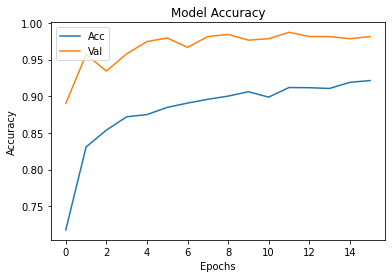

In [15]:
#Evaluation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

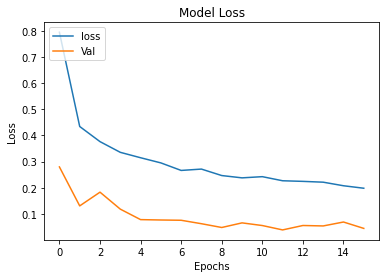

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [22]:
from keras.preprocessing.image import load_img
predict_it = load_img('pre.jpg', target_size=(224,224))

from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(predict_it)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

print (yhat)


[[0. 0. 0. 0. 0. 1.]]


Here we have six classifications in the order freshapples, freshbanana, freshoranges, rottenapples, rottenbanana, rottenoranges. A rotten orange is taken from the internet which is given as an input for prediction. Here the predicted output has last value as one which means it has predicted that the given image is rottenoranges. It shows that the probability of the given image to be a rotten orange is 1 and the remaining probability to be 0.

In [23]:
model.save('./fruit_classification.h5')